In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model

In [2]:
TRAIN_PATH = '../input/fruits-fresh-and-rotten-for-classification/dataset/train/'
TEST_PATH = '../input/fruits-fresh-and-rotten-for-classification/dataset/test/'
SIZE = (240, 240)

In [3]:
labels = []
for class_ in os.listdir(TRAIN_PATH):
    labels.append(class_)
NUM_LABELS = len(labels)

print(labels)

['rottenbanana', 'freshoranges', 'rottenoranges', 'freshbanana', 'rottenapples', 'freshapples']


In [4]:
from keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rescale=1./255, validation_split = 0.1)
test_datagen = ImageDataGenerator(rescale=1./255) 

'''
Comments:
- ImageDataGenerator will resize all images to target_size
- x_col is the column where the images' names are
- y_col is the column where the labels are
- has_ext means that the images' names include a file extension, e.g. image_name.jpg
- Here you can change the targe_size to resize all images to different shapes.
Maybe larger images help in getting a better accuracy
'''
train_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=TRAIN_PATH,
                                                 shuffle=True,
                                                classes=labels,
                                                 target_size=SIZE, 
                                                 subset="training",
                                                 class_mode='categorical')

val_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=TEST_PATH ,
                                                 shuffle=True,
                                                classes=labels,
                                                 target_size=SIZE, 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 9813 images belonging to 6 classes.
Found 268 images belonging to 6 classes.


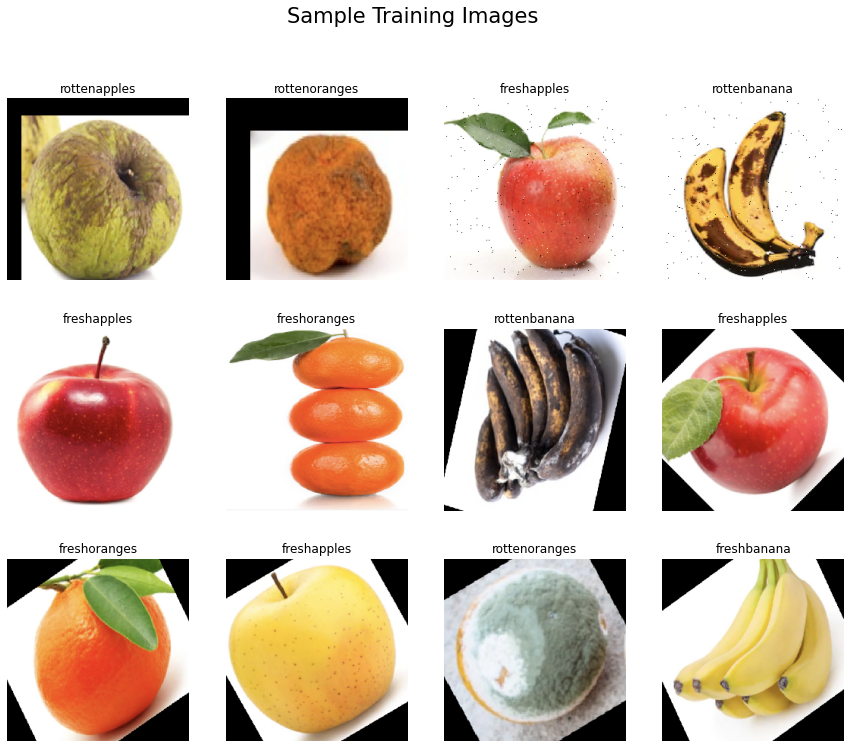

In [5]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
idx = 0

for i in range(3):
    for j in range(4):
        label = labels[np.argmax(train_dataset[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_dataset[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

# plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [6]:
from keras.applications.xception import Xception

In [7]:
from keras.models import Model
from keras.layers import Input, Dense
from tensorflow.keras.optimizers import  Adam


In [8]:
model = Xception(
    include_top=True,
    weights=None,
    input_tensor=Input(shape=(224, 224, 3)),
    input_shape=None,
    pooling=None,
    classes=6,
)


In [9]:

from keras.callbacks import LearningRateScheduler

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [11]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model.summary()
epochs = 20
stepsperepoch=187
validationsteps=1
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=100)
mc = ModelCheckpoint("XCEPTION.h5", monitor='val_loss',save_best_only=True, mode='min',verbose=1)

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [12]:
hist = model.fit_generator(
    train_dataset,
    epochs=epochs,
    callbacks=[annealer,mc,es],
    steps_per_epoch=stepsperepoch,
    validation_data= val_dataset,
    validation_steps = validationsteps
)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
187/187 [==============================] - 152s 733ms/step - loss: 0.6718 - accuracy: 0.7678 - val_loss: 1.7572 - val_accuracy: 0.1875

Epoch 00001: val_loss improved from inf to 1.75723, saving model to XCEPTION.h5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/20
187/187 [==============================] - 139s 742ms/step - loss: 0.3196 - accuracy: 0.8922 - val_loss: 1.6627 - val_accuracy: 0.3125

Epoch 00002: val_loss improved from 1.75723 to 1.66274, saving model to XCEPTION.h5
Epoch 3/20
187/187 [==============================] - 138s 738ms/step - loss: 0.2341 - accuracy: 0.9163 - val_loss: 0.2614 - val_accuracy: 0.8750

Epoch 00003: val_loss improved from 1.66274 to 0.26144, saving model to XCEPTION.h5
Epoch 4/20
187/187 [==============================] - 139s 739ms/step - loss: 0.1883 - accuracy: 0.9323 - val_loss: 0.2548 - val_accuracy: 0.8438

Epoch 00004: val_loss improved from 0.26144 to 0.25480, saving model to XCEPTION.h5
Epoch 5/20
187/187 [==============================] - 138s 737ms/step - loss: 0.1565 - accuracy: 0.9456 - val_loss: 2.2687 - val_accuracy: 0.5625

Epoch 00005: val_loss did not improve from 0.25480
Epoch 6/20
187/187 [==============================] - 138s 739ms/step - loss: 0.1144 - accuracy: 0.9603 - val

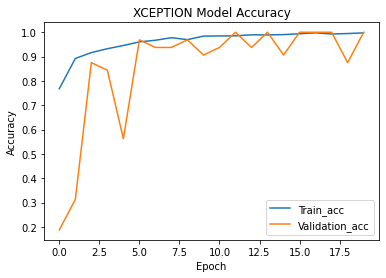

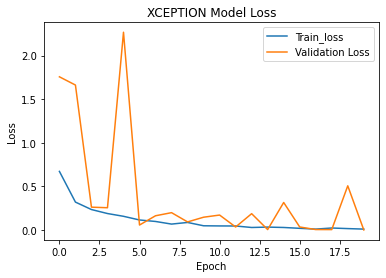

In [13]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('XCEPTION Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(["Train_acc","Validation_acc"])
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('XCEPTION Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(["Train_loss","Validation Loss"])
plt.show()

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(TEST_PATH,
                                                  batch_size=1,
                                                  target_size=SIZE,
                                                  shuffle = False,
                                                  classes=labels,
                                                  class_mode='categorical')


filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)
print('loss test: ',loss)

Found 2698 images belonging to 6 classes.
2698/2698 [==============================] - 89s 33ms/step - loss: 0.0112 - accuracy: 0.9970
accuracy test:  0.9970348477363586
loss test:  0.011244485154747963


In [15]:
predictions = model.predict(test_generator)
files=test_generator.filenames
class_dict=test_generator.class_indices # a dictionary of the form class name: class index
rev_dict={}
for key, value in class_dict.items():
    rev_dict[value]=key

for i, p in enumerate(predictions):
    index=np.argmax(p)
    klass=rev_dict[index]    
    prob=p[index]

In [16]:
print(len(test_generator[0][0]))
print(test_generator[0][1].shape)

1
(1, 6)


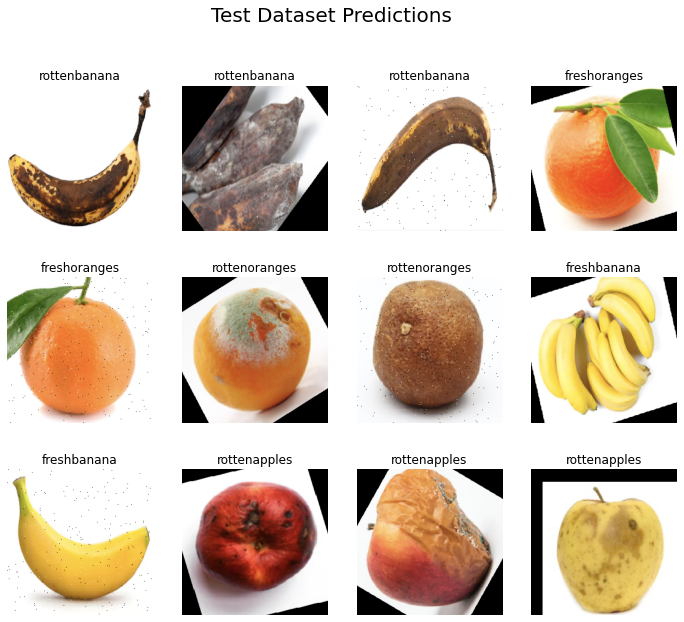

In [17]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(12, 10))
idx = 0

for i in range(3):
    for j in range(4):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[idx][0].reshape(240,240,3))
        ax[i, j].axis("off")
        idx += 200

# plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

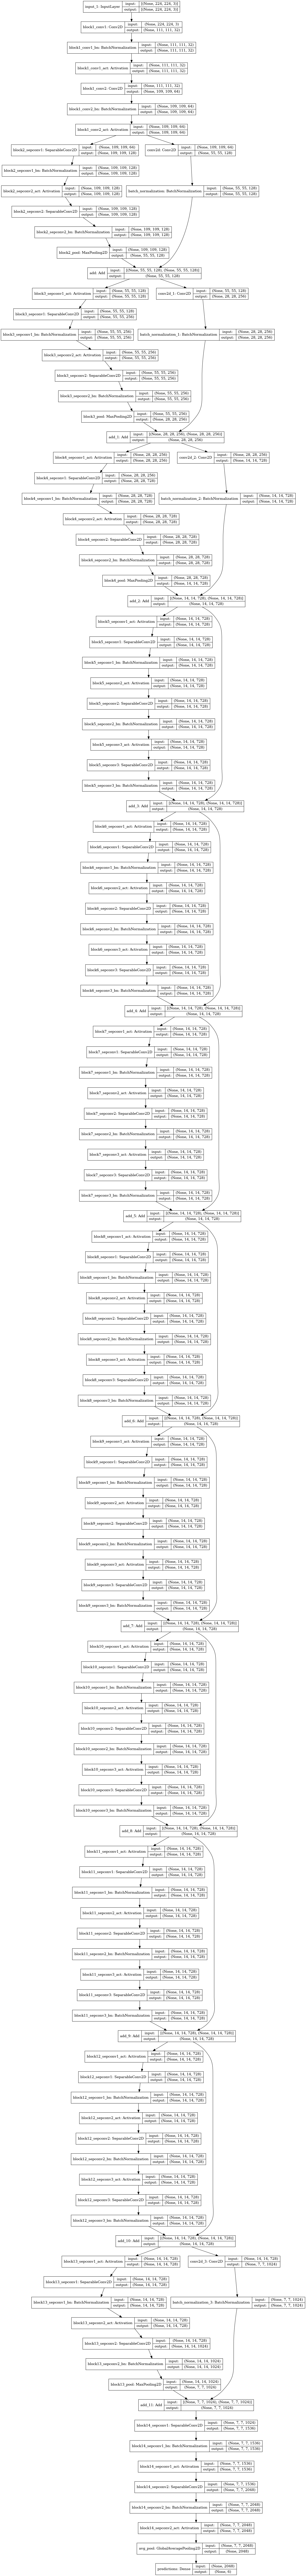

In [18]:
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(
model, to_file='model.png', show_shapes=True, show_dtype=False,
show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

In [19]:
!pip install visualkeras

ERROR: Could not find a version that satisfies the requirement visualkeras (from versions: none)
ERROR: No matching distribution found for visualkeras


In [20]:
from tensorflow.keras import layers
from collections import defaultdict
# from PIL import ImageFont
# font = ImageFont.truetype("arial.ttf", 12)
color_map = defaultdict(dict) #customize the colours
color_map[layers.Conv2D]['fill'] = '#00f5d4'
color_map[layers.MaxPooling2D]['fill'] = '#8338ec'
color_map[layers.Dropout]['fill'] = '#03045e'
color_map[layers.Dense]['fill'] = '#fb5607'
color_map[layers.Flatten]['fill'] = '#ffbe0b'
# visualkeras.layered_view(model, legend=True,color_map=color_map,scale_xy=2, scale_z=1, max_z=200)

In [21]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

In [22]:

predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [23]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  

               precision    recall  f1-score   support

 rottenbanana       1.00      1.00      1.00       530
 freshoranges       0.99      0.99      0.99       388
rottenoranges       0.99      0.99      0.99       403
  freshbanana       1.00      1.00      1.00       381
 rottenapples       1.00      1.00      1.00       601
  freshapples       1.00      1.00      1.00       395

     accuracy                           1.00      2698
    macro avg       1.00      1.00      1.00      2698
 weighted avg       1.00      1.00      1.00      2698



In [25]:
print('Confusion Matrix')
# print(confusion_matrix(test_generator.classes, predicted_classes))
cm = confusion_matrix(test_generator.classes, predicted_classes)

Confusion Matrix


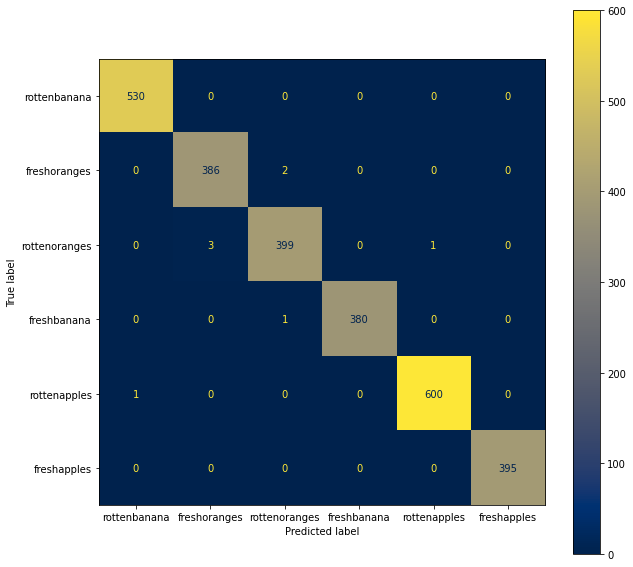

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(test_generator.classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap="cividis")